Import potřebných knihoven.

In [1]:
from pytworkpy import visual, network

Vytvoření instancí potřebnych tříd. Network pro samotnou práci se sítí. Vstupní parametr v jejím konstruktoru je cesta k potřebným datům.

In [2]:
net = network.Network("./data")
vc = visual.Visual((5, 3), 'red', (0.2, 0.2, 0.8, 0.8))

Volání funkce, která trénuje neuronovou síť uvnitř 'Network'. Funkce vrací typle průběhů chybové funkce při trénování a testování.

In [3]:
loss_graph = net.train_network(epochs=5)

EPOCH: 1
0.01 % done. Last loss: 2.3104848861694336
0.07 % done. Last loss: 0.8809816241264343
0.14 % done. Last loss: 0.5342779755592346
0.21 % done. Last loss: 0.9387120604515076
0.27 % done. Last loss: 0.02358362078666687
0.34 % done. Last loss: 0.6386716961860657
0.41 % done. Last loss: 0.5142840147018433
0.47 % done. Last loss: 0.10262478142976761
0.54 % done. Last loss: 0.009622553363442421
0.61 % done. Last loss: 0.5833693146705627
0.67 % done. Last loss: 1.566637396812439
0.74 % done. Last loss: 0.09145967662334442
0.81 % done. Last loss: 0.004203633405268192
0.87 % done. Last loss: 0.0001681121502770111
0.94 % done. Last loss: 0.578216552734375
EPOCH: 2
0.01 % done. Last loss: 0.13068638741970062
0.07 % done. Last loss: 0.33371371030807495
0.14 % done. Last loss: 0.5760893821716309
0.21 % done. Last loss: 0.0038375298026949167
0.27 % done. Last loss: 0.00042849700548686087
0.34 % done. Last loss: 1.1520147323608398
0.41 % done. Last loss: 3.2751482649473473e-05
0.47 % done. La

Nyní vykreslíme průběh chyby při trénování pomocí modulu visual.

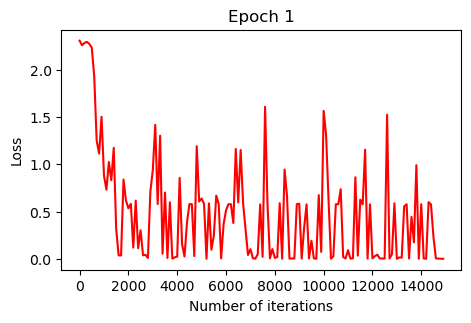

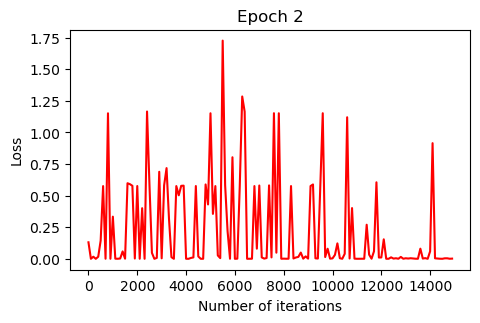

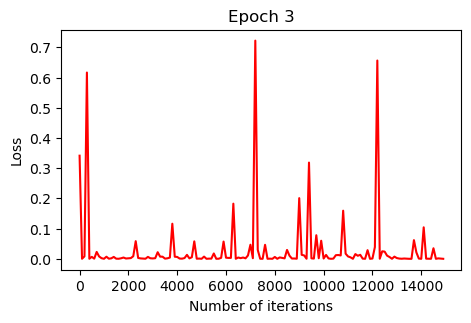

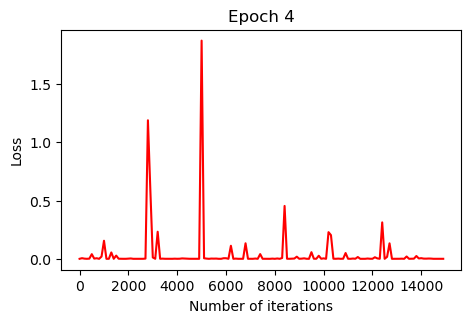

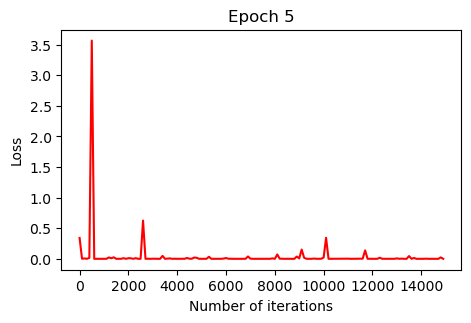

In [4]:
training_loss, testing_loss = loss_graph

vc.plot_loss_per_epoch(training_loss)

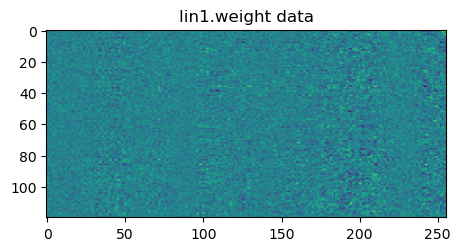

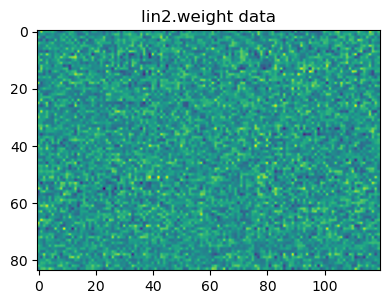

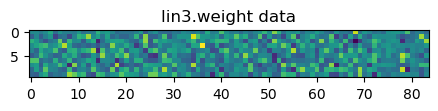

In [5]:
vc.plot_model_lin_weights(net.model)

Otestujeme, jestli natrénovaná neuronová síť umí rozpoznat číslici v 'test.png'.

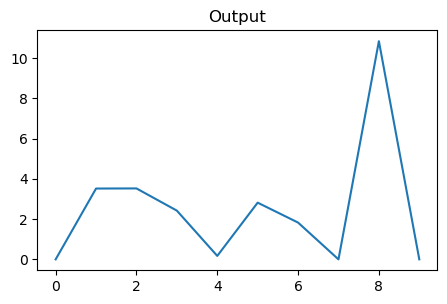

In [6]:
out = net.mnist_digit_classify("test.png")
vc.plot_output(out)

Uložíme momentální stav parametrů neuronové sítě do hdf5 souboru...

In [7]:
net.save_as_h5("mnist_model.h5")

... a vytvoříme novou neuronovou síť, do které už data jenom načteme.

In [8]:
nn2 = network.Network("./data")
nn2.load_from_h5("mnist_model.h5")

Vidíme, že načtená neuronová síť dává stejný výsledek jako ta předchozí.

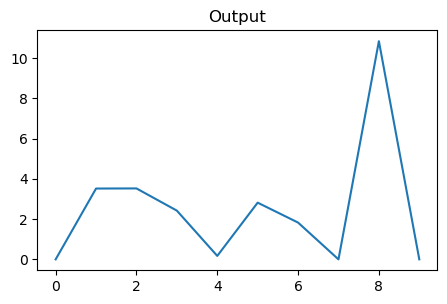

In [9]:
out = nn2.mnist_digit_classify("test.png")
vc.plot_output(out)